# HW4 Rimon Melamed

# Problem 1

1. The sample entropy is defined as: $$H(Y) = -\sum_{y \in Y} p(y) \log_2 p(y)$$
Thus, we can determine the entropy based on the counts for the 2 different $y$ values: 
$$p(+) = \frac{3 + 4 + 4 + 1}{21} = \frac{12}{21} = 0.571$$ \
$$p(-) = \frac{0 + 1 + 3 + 5}{21} = \frac{9}{21} = 0.429$$ \
$$H(Y) = -[0.571 * \log_2 0.571 + 0.429 * \log_2 0.429] = 0.985$$ 


2. First, we need to determine $H(Y|X_1)$ and $H(Y|X_2)$:
$$H(Y|X=x) = -\sum_{y \in Y} p(y|x) \log_2 p(y|x)$$ \
$$H(Y|X_1=T) = -[\frac{1}{8} \log_2(\frac{1}{8}) + \frac{7}{8} \log_2(\frac{7}{8})] = 0.544$$ 
$$H(Y|X_1=F) = -[\frac{8}{13} \log_2(\frac{8}{13}) + \frac{5}{13} \log_2(\frac{5}{13})] = 0.961$$
$$\text{Thus, since we know: } H(Y|X_1) = \sum_{x \in X_1} p(x) H(Y|X_1=x)$$ \
$$H(Y|X_1) = \frac{13}{21} (0.961) + \frac{8}{21} (0.544) = 0.802$$ 
Now do the same for $X_2$
$$H(Y|X_2=T) = -[\frac{3}{10} \log_2(\frac{3}{10}) + \frac{7}{10} \log_2(\frac{7}{10})] = 0.881$$
$$H(Y|X_2=F) = -[\frac{5}{11} \log_2(\frac{5}{11}) + \frac{6}{11} \log_2(\frac{6}{11})] = 0.994$$
$$H(Y|X_2) = \frac{10}{21} (0.881) + \frac{11}{21} (0.994) = 0.940$$

Now we can find the information gains from $X_1$ and $X_2$:
$$IG(X_1) = H(Y) - H(Y|X_1) = 0.985 - 0.802 = 0.183$$
$$IG(X_2) = H(Y) - H(Y|X_2) = 0.985 - 0.940 = 0.045$$ 

3. Since we determined the information gain in the previous part, we know that we will start with $X_1$ since it has a higher information gain. The decision tree is shown constructed below (We also know for $X_1 = T \& X_2 = T$, there are no occurrences of $Y = -$, so we can get rid of it):

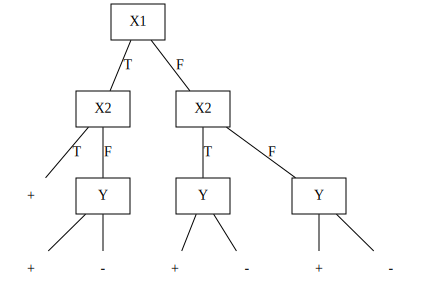

In [1]:
# Problem 1 part 3:
from graphviz import Graph

dot = Graph()
dot.attr('node', shape='box')
dot.node('1', 'X1')
dot.node('2', 'X2')
dot.node('3', 'X2')
dot.edge('1', '2', label='T')
dot.edge('1', '3', label='F')
dot.node('4', '+', shape='plaintext')
dot.edge('2', '4', label='T')
dot.node('5', 'Y')
dot.edge('2', '5', label='F')
dot.node('6', 'Y')
dot.edge('3', '6', label='T')
dot.node('7', 'Y')
dot.edge('3', '7', label='F')
dot.node('8', '+', shape='plaintext')
dot.node('9', '-', shape='plaintext')
dot.node('10', '+', shape='plaintext')
dot.node('11', '-', shape='plaintext')
dot.node('12', '+', shape='plaintext')
dot.node('13', '-', shape='plaintext')
dot.edge('5', '8')
dot.edge('5', '9')
dot.edge('6', '10')
dot.edge('6', '11')
dot.edge('7', '12')
dot.edge('7', '13')

dot

# Problem 2

In [2]:
import csv 
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
# Pre-processing: import the data
data_arr = []

with open('Pokemon.csv') as csv_file:
    data_reader = csv.reader(csv_file, delimiter=',')
    for row in data_reader:
        data_arr.append(row)

In [4]:
features_X = []
legendary_Y = np.array([1 if e[12] == 'True' else 0 for e in data_arr[1::]])
feature_names = ['Type 1', 'Type 2', 'Total', 'HP',\
                                                              'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

# We need to transform the string labels into one-hot-encoded integers so that the sklearn package will work with the data
le = LabelEncoder()
le.fit(['', 'Normal', 'Fire', 'Water', 'Grass', 'Electric', \
       'Ice', 'Fighting', 'Poison', 'Ground', 'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Dark', 'Dragon', 'Steel', 'Fairy'])
features_X.append(le.transform([e[2] for e in data_arr[1::]]))
features_X.append(le.transform([e[3] for e in data_arr[1::]]))

for i in range(4, 12):
    features_X.append([e[i] for e in data_arr[1::]])

features_X = np.array(features_X)

In [5]:
dt = tree.DecisionTreeClassifier(criterion='entropy')

features_X = features_X.reshape(800, 10)
(train_X, test_X, train_Y, test_Y) = train_test_split(features_X, legendary_Y, test_size=.25)
dt.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy')

In [6]:
dt.score(test_X, test_Y)

0.825

In [7]:
#Now, the random forest classifier
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)

RandomForestClassifier()

In [8]:
rf.score(test_X, test_Y)

0.94

In [9]:
# We will also go ahead and use k-fold cross validation on the entire dataset to judge the 2 different models
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(dt, features_X, legendary_Y, scoring='accuracy', cv=cv)
print('Accuracy of Decision Tree: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

scores = cross_val_score(rf, features_X, legendary_Y, scoring='accuracy', cv=cv)
print('Accuracy of Random Forest: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy of Decision Tree: 0.863 (0.032)
Accuracy of Random Forest: 0.927 (0.019)


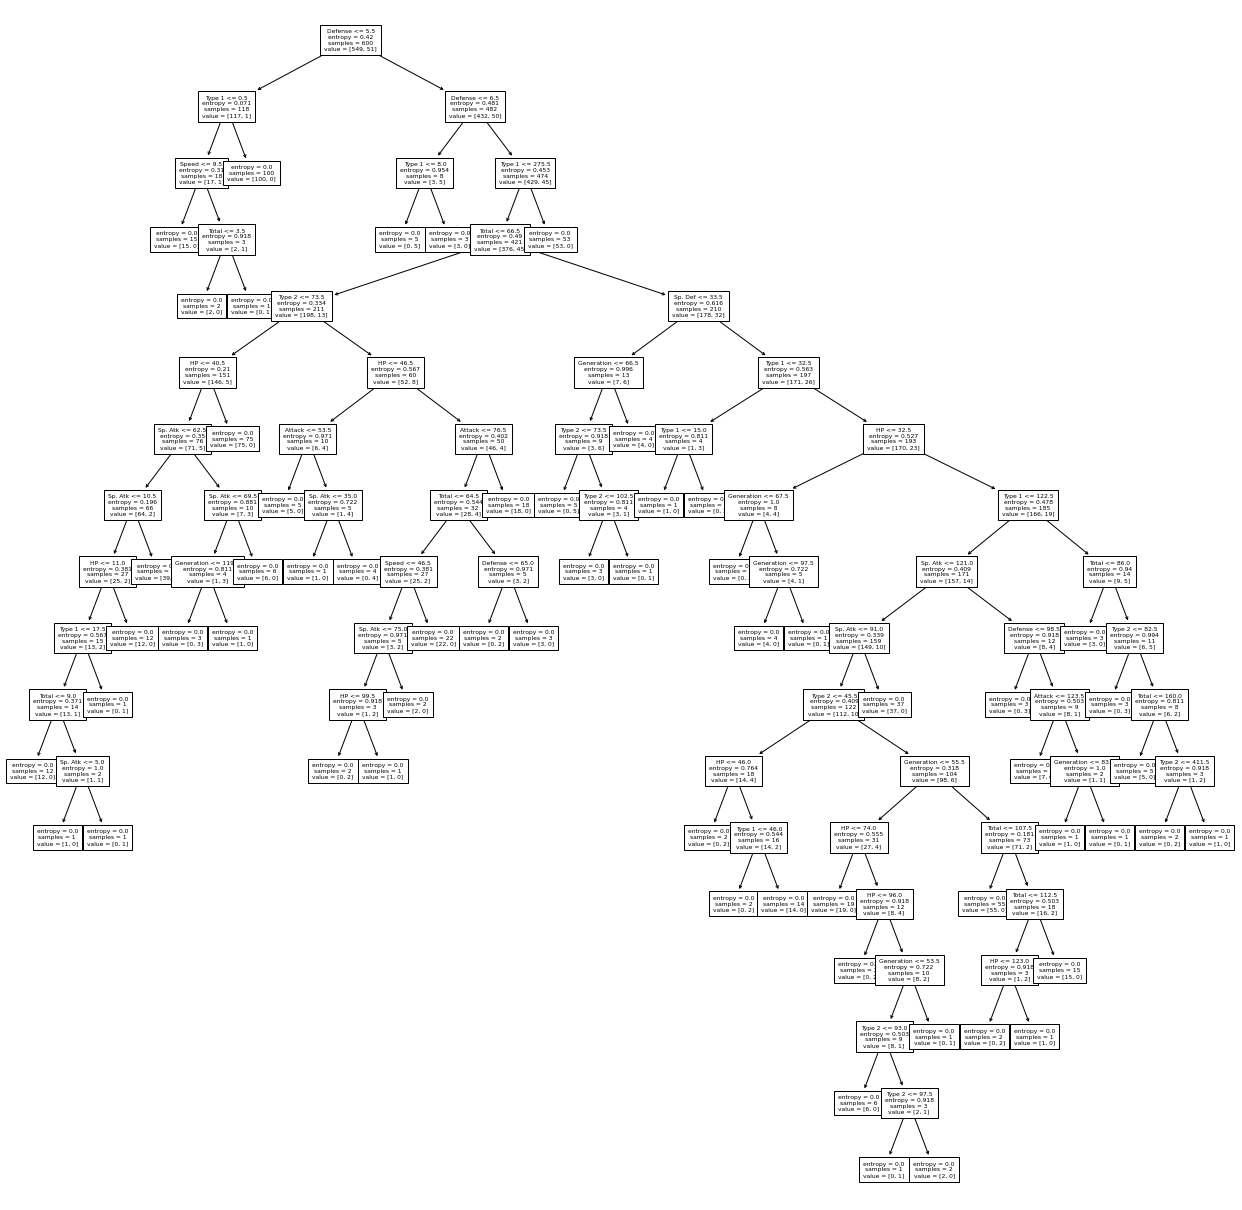

In [10]:
# We can also see the actual decision tree that was created, and determine the features which are the best indicators based on
# the entropy and information gains
plt.figure(figsize=(22, 22))
tree.plot_tree(dt, fontsize=6, feature_names = feature_names)
plt.savefig('decision_tree_hw.jpg', dpi=100)

In [11]:
feature_ranks = np.sort(dt.feature_importances_)
feature_idxs = np.argsort(dt.feature_importances_)
print('Feature importances for the Decision Tree (from lowest importance to highest):\n')
for i in range(0, len(feature_names)):
    print(feature_names[feature_idxs[i]], ': ', feature_ranks[i])

Feature importances for the Decision Tree (from lowest importance to highest):

Sp. Def :  0.021795059998682805
Speed :  0.03276356159523105
Attack :  0.04506380710949333
Generation :  0.0925023749092868
Type 2 :  0.1105046846452374
Sp. Atk :  0.11817050286234587
Total :  0.12465356074119523
Defense :  0.12921184627980617
HP :  0.14677798404888098
Type 1 :  0.17855661780984045


In [12]:
feature_ranks = np.sort(rf.feature_importances_)
feature_idxs = np.argsort(rf.feature_importances_)
print('Feature importances for the Random Forest (from lowest importance to highest):\n')
for i in range(0, len(feature_names)):
    print(feature_names[feature_idxs[i]], ': ', feature_ranks[i])

Feature importances for the Random Forest (from lowest importance to highest):

Sp. Atk :  0.08274831154894821
Defense :  0.08369324772318883
Generation :  0.09178059583111957
Type 1 :  0.09340621232006613
Attack :  0.09514876554530344
Type 2 :  0.09931919538018306
Speed :  0.1067566317035278
Sp. Def :  0.10697810720852553
Total :  0.10961148227718094
HP :  0.13055745046195652


# Analysis

Overall, we can see that the accuracy of the Random Forest (93%) is decently higher than that of the Decision Tree (86%). This is to be expected, as a Random Forest is essentially an amolgomation of decision trees, where the forest selects random data points and features to build multiple decision trees, which are then averaged, and then the class that is assigned is the highest voted one among all the trees. Thus we can expect that the random forest will also produce lower variance(std. dev of 0.019 vs the decision tree's 0.032), and will score higher in terms of accuracy on a new, previously unknown, test set, which is exactly the result that we see above. However, there are some other trade offs. For example, we can see the constructed decision tree clearly shown above (it is also included as a full res image as part of the submission), which makes the decision tree model much more simple, and reveals explainability as well as feature selection. On the other hand, the random forest model is much more black box, and harder to interpet. From the decision tree, we can also see the entropy at each stage, and the way the algorithm performs the relevant feature selection. Some other issues with the decision tree are that in general, it is more prone to overfitting than a random forest, which could explain some of the accuracy drop off as well.

As for the feature importance, we can see that shown above. For the decision tree model, the defense appears to be the best (based on entropy), while for the random forest model, speed appears to be the best (with defense being the worst). However, we must also consider that by inspection, the variance of the random forest feature importance is *much* lower than that of the decision tree. This is again to be expected, as we mentioned earlier that the random forest will reduce the variance of the model on new data since it will reduce sensitivity to individual data points moreso than the decision tree. 

We could also consider tuning some hyperparamaters for the models in order to increase their accuracy, such as changing the criterion for splitting from entropy (information gain), to the GINI impurity, which would improve computation time, but results would be a little less accurate, and for a dataset this small, entropy is fine. Sklearn also allows the user to specify the minimum number of samples that would constitute another split in the tree, which is interesting, as this serves as more of an approximation if the data takes many steps to converge, or does not converge uniformly at all. Some other attributes which could affect the bias/variance tradeoff in the random forest and decision tree is that if we add more splits to the trees, we will have deeper trees with more pure nodes, but this will lead to higher variance with lower bias, while if we limit the depth, we can get a lower variance, but more bias in the data. For the random forest, we can also control the amount of variables that we use to explain the data, which will lead to higher bias on each individual tree, but lower variance overall in the model, and in most cases, this tends to produce a better model overall. 